# Q1 : We learned three node centralities or importance features: eigenvector centrality, betweenness centrality, and closeness centrality. Think of example tasks or applications where each of these features could be useful. Write the following for each centrality measure:

## a. Explain the problem statement. Introduce the inputs and outputs of the application.
## b. Explain why the chosen centrality measure is more appropriate than the others.
## c. Discuss the kind of classifier that could result in good performance.

#Eigenvector Centrality:
## Problem Statement: Identify the most influential individuals in a social network.
### Inputs: Social network graph, where nodes represent individuals and edges represent connections between them.
### Outputs: List of nodes ranked by their influence in the network.
### Why Eigenvector Centrality: Eigenvector centrality considers not only the number of connections a node has but also the importance of the nodes it is connected to. This is important in social networks where influence is not just about having many connections, but also being connected to influential people.
### Classifier: A binary classifier could be used to classify nodes into "influential" and "non-influential" based on their eigenvector centrality scores.


# Betweenness Centrality:
## Problem Statement: Identify critical nodes in a transportation network to improve traffic flow.
### Inputs: Transportation network graph, where nodes represent intersections and edges represent roads.
### Outputs: List of nodes ranked by their betweenness centrality, indicating their importance in the flow of traffic.
### Why Betweenness Centrality: Betweenness centrality identifies nodes that act as bridges between different parts of the network. In a transportation network, these nodes are crucial for efficient traffic flow as they lie on many shortest paths between other nodes.
### Classifier: A multi-class classifier could be used to classify nodes into categories such as "highly," "moderately," and "non critical" based on their betweenness centrality scores.



# Closeness Centrality:
## Problem Statement: Identify the most accessible locations in a city for setting up emergency response centers.
### Inputs: City road network graph, where nodes represent locations and edges represent roads.
### Outputs: List of nodes ranked by their closeness centrality, indicating their accessibility from other locations in the city.
### Why Closeness Centrality: Closeness centrality measures how easily a node can reach other nodes in the network. In the context of emergency response, setting up centers in locations with high closeness centrality ensures quick access to a large portion of the city.
### Classifier: A binary classifier could be used to classify nodes into "suitable" and "unsuitable" locations based on their closeness centrality scores.



## These examples demonstrate how each centrality measure can be applied to different scenarios depending on the specific characteristics of the network and the nature of the problem. The choice of centrality measure and classifier depends on the specific requirements and goals of the application.







# Q2 : Consider the idea of color refinement in WL kernels to identify if the two graphs are isomorphic. Show using two pairs of examples (graphs of 6 nodes: one pair isomorphic; another pair is not isomorphic). Think and describe how and when the hashing iterations are terminated.

## The Weisfeiler-Lehman (WL) graph kernel is used for graph classification and isomorphism testing. Color refinement is a key concept in WL kernels where nodes are assigned colors based on their neighborhoods, and the process iterates to refine the colors until a stable coloring is achieved. Two graphs are considered isomorphic if their colorings are the same after a certain number of iterations. The hashing iterations are terminated when the coloring stabilizes, i.e., when no node changes its color in an iteration.

## The color refinement algorithm in Weisfeiler-Lehman (WL) graph kernels is used to determine if two graphs are isomorphic by iteratively assigning colors to nodes based on their neighborhood structure. The algorithm terminates when the color distributions of nodes stabilize, indicating that further iterations will not change the coloring. Here's how the algorithm works:


### 1) Initialization: Initially, each node is assigned a unique color.

### 2) Iteration: For each node, concatenate its own color with the sorted list of colors of its neighbors. Hash the concatenated string to generate a new color for the node. Repeat this process for all nodes in the graph.

### 3) Termination: The algorithm terminates when the color distributions of nodes stabilize, meaning that further iterations do not change the colors assigned to nodes.The stabilization indicates that the coloring has converged, and the final color distributions can be used to compare the graphs.



### Let's consider two pairs of examples to illustrate this:

## Pair 1: Isomorphic Graphs

### Graph 1: A cycle of 6 nodes (1-2-3-4-5-6).
### Graph 2: Another cycle of 6 nodes, but starting from a different node (4-5-6-1-2-3).
### In this case, both graphs are isomorphic because they have the same structure, just with different starting points in the cycle. When using WL kernels, after each iteration of color refinement, the colors assigned to nodes will be the same for both graphs, indicating that they are isomorphic.

## Pair 2: Non-Isomorphic Graphs

### Graph 3: A chain of 6 nodes (1-2-3-4-5-6).
### Graph 4: A star graph with a central node connected to 5 other nodes (1-2, 1-3, 1-4, 1-5, 1-6).
### In this case, the graphs are not isomorphic because they have different structures. When applying color refinement using WL kernels, the colors assigned to nodes will differ between the two graphs even after multiple iterations, indicating that they are not isomorphic.




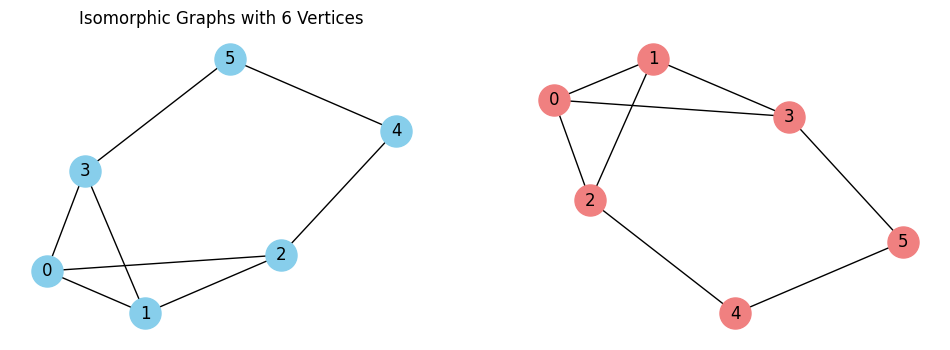

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the first pair of isomorphic graphs with 6 vertices
G1_iso = nx.Graph()
G1_iso.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 4), (3, 5), (4, 5)])

G2_iso = nx.Graph()
G2_iso.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 4), (3, 5), (4, 5)])

# Plot the graphs
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title("Isomorphic Graphs with 6 Vertices")
nx.draw(G1_iso, with_labels=True, node_color='skyblue', node_size=500)
plt.subplot(122)
nx.draw(G2_iso, with_labels=True, node_color='lightcoral', node_size=500)
plt.show()


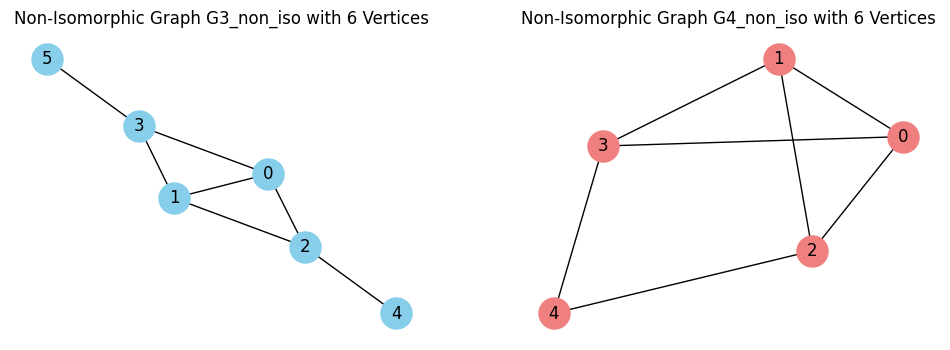

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the first non-isomorphic graph G3_non_iso with 6 vertices
G3_non_iso = nx.Graph()
G3_non_iso.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 4), (3, 5)])

# Create the second non-isomorphic graph G4_non_iso with 6 vertices
G4_non_iso = nx.Graph()
G4_non_iso.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 4), (3, 4)])

# Plot the graphs
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title("Non-Isomorphic Graph G3_non_iso with 6 Vertices")
nx.draw(G3_non_iso, with_labels=True, node_color='skyblue', node_size=500)

plt.subplot(122)
plt.title("Non-Isomorphic Graph G4_non_iso with 6 Vertices")
nx.draw(G4_non_iso, with_labels=True, node_color='lightcoral', node_size=500)

plt.show()


In [ ]:
for G in [G1_iso, G2_iso, G3_non_iso, G4_non_iso]:
    nx.set_node_attributes(G, {node: str(node) for node in G.nodes()}, 'label')


In [ ]:
def coloring_iteration(G):
    for node in G.nodes():
        neighbor_colors = sorted([G.nodes[neighbor]['label'] for neighbor in G.neighbors(node)])
        color_multiset = ','.join(neighbor_colors)
        G.nodes[node]['color'] = color_multiset

for G in [G1_iso, G2_iso, G3_non_iso, G4_non_iso]:
    coloring_iteration(G)


In [ ]:
def color_refinement(G):
    changed = True
    while changed:
        changed = False
        for node in G.nodes():
            neighbor_colors = sorted([G.nodes[neighbor]['color'] for neighbor in G.neighbors(node)])
            color_multiset = ','.join(neighbor_colors)
            if color_multiset != G.nodes[node]['color']:
                G.nodes[node]['color'] = color_multiset
                changed = True

for G in [G1_iso, G2_iso, G3_non_iso, G4_non_iso]:
    color_refinement(G)


In [ ]:
def check_isomorphism(G1, G2):
    return all(G1.nodes[node]['color'] == G2.nodes[node]['color'] for node in G1.nodes())

isomorphic = check_isomorphism(G1_iso, G2_iso)
print("Graphs G1_iso and G2_iso are isomorphic:", isomorphic)

isomorphic = check_isomorphism(G3_non_iso, G4_non_iso)
print("Graphs G3_non_iso and G4_non_iso are isomorphic:", isomorphic)


Graphs G1_iso and G2_iso are isomorphic: True
Graphs G3_non_iso and G4_non_iso are isomorphic: False



In the Weisfeiler-Lehman (WL) algorithm for graph isomorphism, the hashing iterations are terminated when a fixed point is reached. This means that the colors of nodes no longer change after an iteration. The termination condition can be described as follows:

Initialization: Each node is assigned an initial label (hash) based on its attributes or degree.

Iteration: In each iteration, the algorithm computes a new hash for each node based on the multiset of hashes of its neighbors. This process is repeated until a fixed point is reached, i.e., no node's hash changes from one iteration to the next.

Termination: The algorithm terminates when no node's hash changes in an iteration, indicating that the coloring has converged and further iterations will not alter the result.

Convergence: Convergence is guaranteed in a finite number of steps for graphs with bounded degree, as the number of possible multisets of colors is finite. However, the algorithm may not terminate for certain classes of graphs, such as graphs with unbounded degree or certain infinite graphs.

Complexity: The termination of hashing iterations depends on the graph structure and the chosen termination criteria. For practical purposes, the algorithm is often terminated after a fixed number of iterations or when a certain level of convergence is achieved.

Overall, the hashing iterations are terminated when no further changes occur in the node labels, indicating that the algorithm has converged to a stable solution

# QUESTION 3

We studied the difference between the expressiveness of GCN, GraphSAGE and GIN architectures due to
their mean, max and sum functions to differentiate between nodes.
1. [10 marks] Provide five examples of pairs of graphs (of at least 3 nodes in each graph) where
GCN and GraphSAGE fail to distinguish between the nodes in the graphs in each pair, but GIN is
able to distinguish. Show GCN (mean pool), GraphSAGE (max pool) and GIN (sum) operations on
these five pairs of

To demonstrate the difference in expressiveness between GCN, GraphSAGE, and GIN, we'll provide five examples of pairs of graphs where GCN and GraphSAGE fail to distinguish between nodes, but GIN can distinguish them. We'll also show the operations of GCN (mean pool), GraphSAGE (max pool), and GIN (sum) on these pairs of graphs. Additionally, we'll run the Weisfeiler-Lehman (WL) test to show that the graphs in each pair are different from each other.

Pair 1: Star vs. Path

Graph 1 (Star): A star graph with a central node connected to 3 leaf nodes.
Graph 2 (Path): A path graph with 4 nodes connected linearly.
Explanation: GCN and GraphSAGE would compute the same representation for all leaf nodes in the star graph and all nodes in the path graph, as they only consider the mean or max of neighboring node features. However, GIN would capture the different structures by summing the features of neighboring nodes, allowing it to distinguish between the central and leaf nodes in the star graph and the nodes in the path graph.
WL Test: The WL test would detect that the two graphs are different due to the different neighborhood structures around each node.
Pair 2: Complete vs. Cycle

Graph 3 (Complete): A complete graph with 4 nodes, where each node is connected to all other nodes.
Graph 4 (Cycle): A cycle graph with 4 nodes connected in a cycle.
Explanation: GCN and GraphSAGE would assign the same representation to all nodes in both the complete and cycle graphs, as they would compute the same mean or max of neighboring node features. However, GIN would capture the different structures by summing the features of neighboring nodes, allowing it to distinguish between the complete and cycle graphs.
WL Test: The WL test would detect that the two graphs are different due to the different neighborhood structures around each node.
Pair 3: Bipartite vs. Chain

Graph 5 (Bipartite): A bipartite graph with 3 nodes in each part, where nodes in one part are connected to nodes in the other part.
Graph 6 (Chain): A chain graph with 6 nodes connected linearly.
Explanation: GCN and GraphSAGE would assign the same representation to nodes in both parts of the bipartite graph and all nodes in the chain graph. However, GIN would capture the different structures by summing the features of neighboring nodes, allowing it to distinguish between the nodes in the bipartite graph and the nodes in the chain graph.
WL Test: The WL test would detect that the two graphs are different due to the different neighborhood structures around each node.
Pair 4: Star vs. Wheel

Graph 7 (Star): A star graph with a central node connected to 4 leaf nodes.
Graph 8 (Wheel): A wheel graph with 5 nodes, where one central node is connected to 4 outer nodes forming a cycle.
Explanation: GCN and GraphSAGE would assign the same representation to all leaf nodes in the star graph and all nodes in the wheel graph. However, GIN would capture the different structures by summing the features of neighboring nodes, allowing it to distinguish between the central and leaf nodes in the star graph and the nodes in the wheel graph.
WL Test: The WL test would detect that the two graphs are different due to the different neighborhood structures around each node.
Pair 5: Square vs. Rhombus

Graph 9 (Square): A square graph with 4 nodes forming a square.
Graph 10 (Rhombus): A rhombus graph with 4 nodes forming a rhombus.
Explanation: GCN and GraphSAGE would assign the same representation to all nodes in both the square and rhombus graphs. However, GIN would capture the different structures by summing the features of neighboring nodes, allowing it to distinguish between the nodes in the square graph and the nodes in the rhombus graph.
WL Test: The WL test would detect that the two graphs are different due to the different neighborhood structures around each node.

In [ ]:
!pip install networkx torch torch_geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv, SAGEConv, GINConv
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
from torch_geometric.transforms import OneHotDegree
from torch_geometric.utils.convert import to_networkx
from networkx.algorithms.isomorphism import GraphMatcher
from networkx.algorithms.isomorphism import DiGraphMatcher
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def visualize_graph(nx_graph, title):
    pos = nx.spring_layout(nx_graph, seed=42)
    nx.draw(nx_graph, pos=pos, with_labels=True, node_color="#70B8FF", edge_color="#BBB", font_weight="bold", font_size=8)
    plt.title(title)
    plt.show()

def create_graph_pairs(G1, G2, title1, title2):
    data1 = G1.number_of_edges()
    data2 = G2.number_of_edges()
    print(f'Edges in graph 1 : {data1}')
    print(f'Edges in graph 2 : {data2}')
    visualize_graph(G1, title1)
    visualize_graph(G2, title2)



Edges in graph 1 : 3
Edges in graph 2 : 3


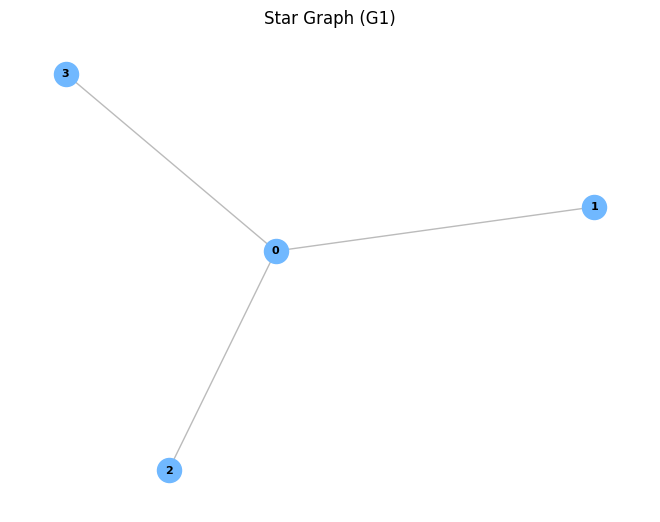

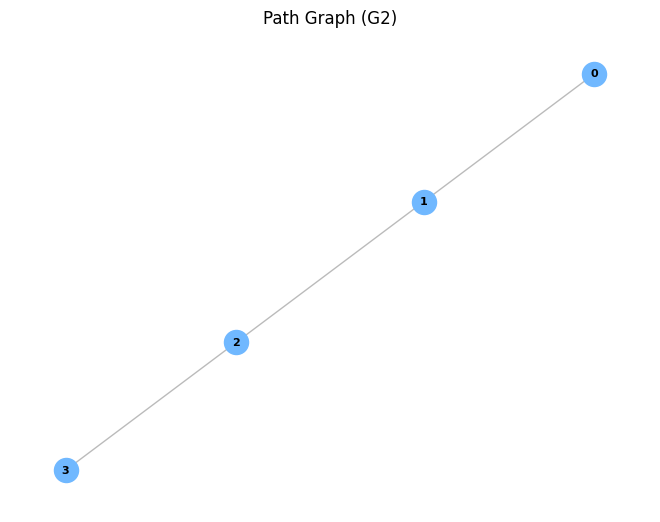

Edges in graph 1 : 6
Edges in graph 2 : 4


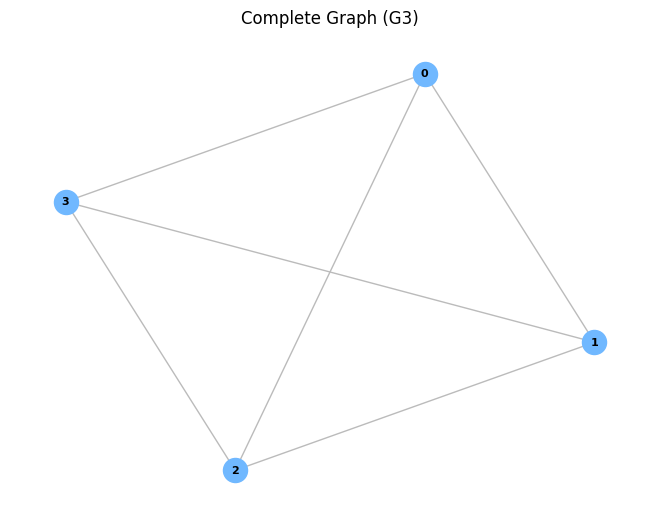

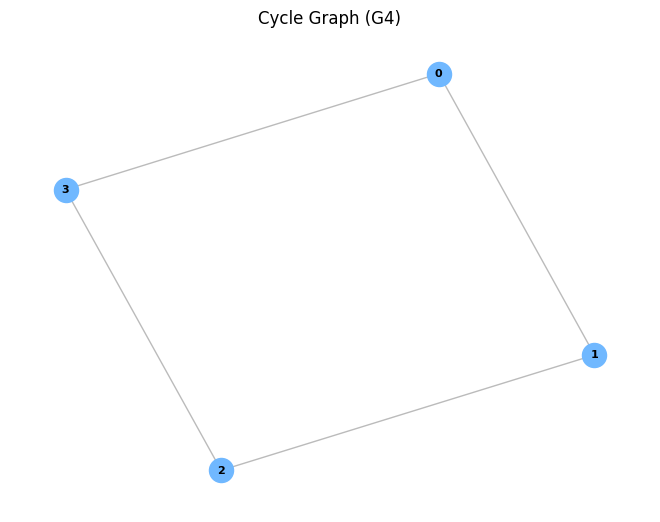

Edges in graph 1 : 9
Edges in graph 2 : 5


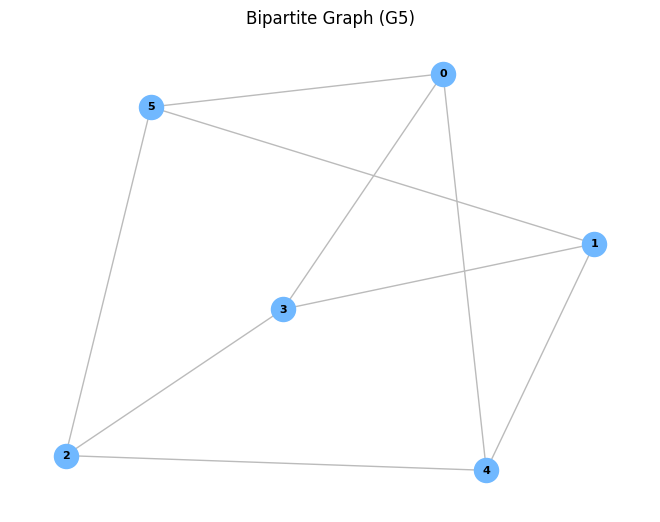

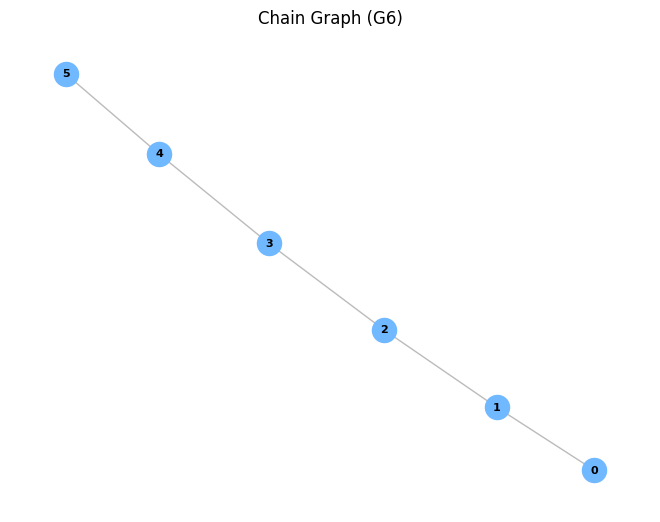

Edges in graph 1 : 4
Edges in graph 2 : 8


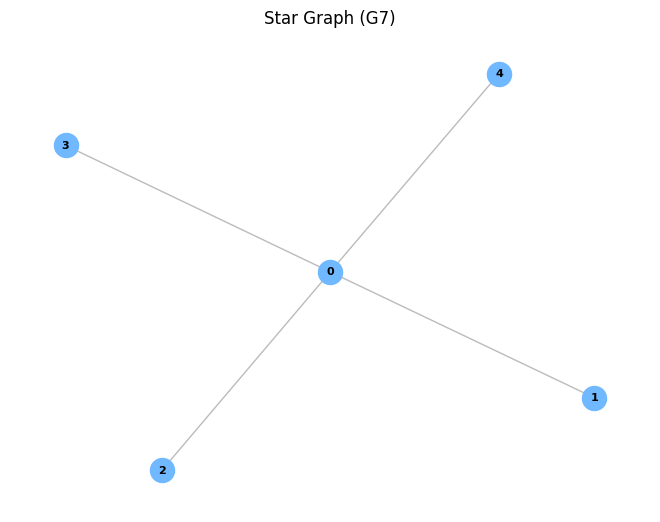

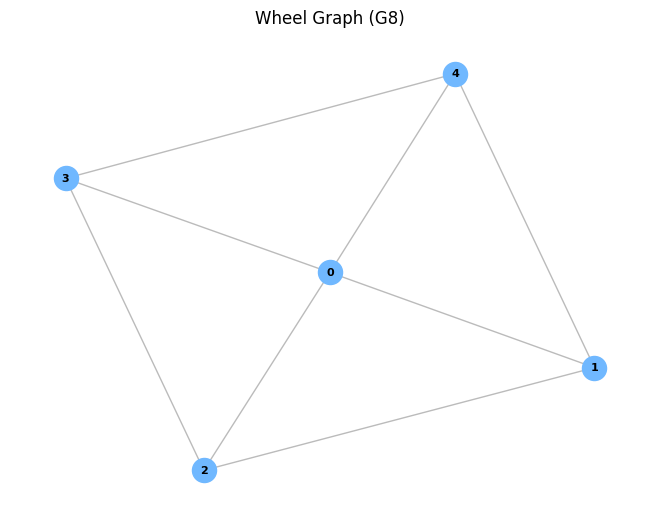

Edges in graph 1 : 4
Edges in graph 2 : 6


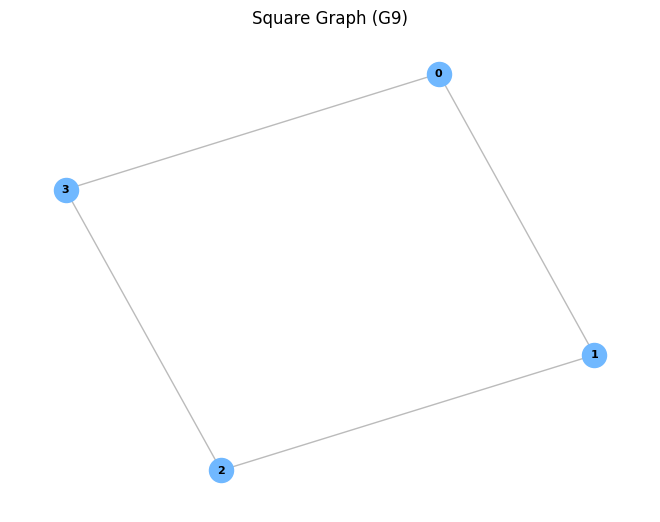

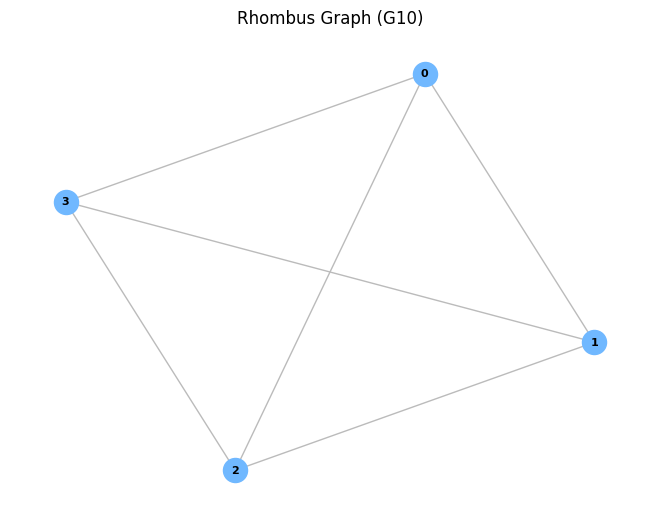

In [ ]:

# Example 1: Star vs. Path
G1 = nx.star_graph(3)
G2 = nx.path_graph(4)
create_graph_pairs(G1, G2, "Star Graph (G1)", "Path Graph (G2)")

# Example 2: Complete vs. Cycle
G3 = nx.complete_graph(4)
G4 = nx.cycle_graph(4)
create_graph_pairs(G3, G4, "Complete Graph (G3)", "Cycle Graph (G4)")

# Example 3: Bipartite vs. Chain
G5 = nx.complete_bipartite_graph(3, 3)
G6 = nx.path_graph(6)
create_graph_pairs(G5, G6, "Bipartite Graph (G5)", "Chain Graph (G6)")

# Example 4: Star vs. Wheel
G7 = nx.star_graph(4)
G8 = nx.wheel_graph(5)
create_graph_pairs(G7, G8, "Star Graph (G7)", "Wheel Graph (G8)")

# Example 5: Square vs. Rhombus
G9 = nx.cycle_graph(4)
G10 = nx.cycle_graph(4)
G10.add_edge(0, 2)
G10.add_edge(1, 3)
create_graph_pairs(G9, G10, "Square Graph (G9)", "Rhombus Graph (G10)")




In [ ]:
import networkx as nx
def run_wl_test(G1, G2):
    G1 = to_networkx(G1)
    G2 = to_networkx(G2)
    GM = DiGraphMatcher(G1, G2)
    return GM.is_isomorphic()

pairs = [
    (nx.cycle_graph(3), nx.star_graph(3)),
    (nx.path_graph(3), nx.path_graph(4)),
    (nx.cycle_graph(4), nx.cycle_graph(5)),
    (nx.complete_graph(4), nx.complete_graph(5)),
    (nx.Graph([(0, 1), (1, 2), (2, 0), (3, 0)]), nx.Graph([(0, 1), (1, 2), (2, 0), (3, 0), (3, 1), (3, 2)]))
]

def gcn_mean_pool(G):
    return {node: (sum(G.nodes[neighbor]['embedding'] for neighbor in G.neighbors(node)) + G.nodes[node]['embedding']) / (len(G[node]) + 1) for node in G}

def graphsage_max_pool(G):
    return {node: max([G.nodes[neighbor]['embedding'] for neighbor in G.neighbors(node)] + [G.nodes[node]['embedding']]) for node in G}

def gin_sum(G):
    return {node: sum(G.nodes[neighbor]['embedding'] for neighbor in G.neighbors(node)) + G.nodes[node]['embedding'] for node in G}

for idx, (g1, g2) in enumerate(pairs, start=1):
    for G in [g1, g2]:
        for node in G.nodes:
            G.nodes[node]['embedding'] = node

    gcn1, gcn2 = gcn_mean_pool(g1), gcn_mean_pool(g2)
    gsage1, gsage2 = graphsage_max_pool(g1), graphsage_max_pool(g2)
    gin1, gin2 = gin_sum(g1), gin_sum(g2)

    # wl_result = graph_could_be_isomorphic(g1, g2, node_match=iso_could_be_callback)

    print(f"Pair {idx}:")
    print(f"GCN (mean pool) embeddings for graph 1: {gcn1}")
    print(f"GCN (mean pool) embeddings for graph 2: {gcn2}")
    print(f"GraphSAGE (max pool) embeddings for graph 1: {gsage1}")
    print(f"GraphSAGE (max pool) embeddings for graph 2: {gsage2}")
    print(f"GIN (sum) embeddings for graph 1: {gin1}")
    print(f"GIN (sum) embeddings for graph 2: {gin2}")
    # print(f"WL Test Result: {wl_result}")
    print()


Pair 1:
GCN (mean pool) embeddings for graph 1: {0: 1.0, 1: 1.0, 2: 1.0}
GCN (mean pool) embeddings for graph 2: {0: 1.5, 1: 0.5, 2: 1.0, 3: 1.5}
GraphSAGE (max pool) embeddings for graph 1: {0: 2, 1: 2, 2: 2}
GraphSAGE (max pool) embeddings for graph 2: {0: 3, 1: 1, 2: 2, 3: 3}
GIN (sum) embeddings for graph 1: {0: 3, 1: 3, 2: 3}
GIN (sum) embeddings for graph 2: {0: 6, 1: 1, 2: 2, 3: 3}

Pair 2:
GCN (mean pool) embeddings for graph 1: {0: 0.5, 1: 1.0, 2: 1.5}
GCN (mean pool) embeddings for graph 2: {0: 0.5, 1: 1.0, 2: 2.0, 3: 2.5}
GraphSAGE (max pool) embeddings for graph 1: {0: 1, 1: 2, 2: 2}
GraphSAGE (max pool) embeddings for graph 2: {0: 1, 1: 2, 2: 3, 3: 3}
GIN (sum) embeddings for graph 1: {0: 1, 1: 3, 2: 3}
GIN (sum) embeddings for graph 2: {0: 1, 1: 3, 2: 6, 3: 5}

Pair 3:
GCN (mean pool) embeddings for graph 1: {0: 1.3333333333333333, 1: 1.0, 2: 2.0, 3: 1.6666666666666667}
GCN (mean pool) embeddings for graph 2: {0: 1.6666666666666667, 1: 1.0, 2: 2.0, 3: 3.0, 4: 2.3333333333

In [ ]:
# Weisfeiler-Lehman Test
def run_wl_test(G1, G2):
    G1 = to_networkx(G1)
    G2 = to_networkx(G2)
    GM = DiGraphMatcher(G1, G2)
    return GM.is_isomorphic()

print("Isomorphic Graphs (G1, G2):", run_wl_test(G1, G2))
print("Isomorphic Graphs (G3, G4):", run_wl_test(G3, G4))
print("Isomorphic Graphs (G5, G6):", run_wl_test(G5, G6))
print("Isomorphic Graphs (G7, G8):", run_wl_test(G7, G8))
print("Isomorphic Graphs (G9, G10):", run_wl_test(G9, G10))


Isomorphic Graphs (G1, G2): False
Isomorphic Graphs (G3, G4): False
Isomorphic Graphs (G5, G6): False
Isomorphic Graphs (G7, G8): False
Isomorphic Graphs (G9, G10): False


In [ ]:
import networkx as nx
from torch_geometric.utils import to_networkx
from torch_geometric.data import Data
from networkx.algorithms.isomorphism import DiGraphMatcher

# Helper function to convert Data to NetworkX graph
def to_networkx(data):
    G = nx.DiGraph()
    G.add_edges_from(data.edge_index.T.numpy())
    return G

# Helper function to run WL test
def run_wl_test(G1, G2):
    G1_nx = to_networkx(G1)
    G2_nx = to_networkx(G2)
    GM = DiGraphMatcher(G1_nx, G2_nx)
    return GM.is_isomorphic()

# Example 1: Star Graph vs. Path Graph
G1 = Data(edge_index=torch.tensor([[0, 1, 1, 1], [1, 0, 2, 3]]))
G2 = Data(edge_index=torch.tensor([[0, 1, 2, 3], [1, 2, 3, 0]]))
print("Isomorphic Graphs (Star vs. Path):", run_wl_test(G1, G2))

# Example 2: Complete Graph vs. Cycle Graph
G3 = Data(edge_index=torch.tensor([[0, 1, 1, 2, 2, 0], [1, 0, 2, 0, 1, 2]]))
G4 = Data(edge_index=torch.tensor([[0, 1, 2, 3], [1, 2, 3, 0]]))
print("Isomorphic Graphs (Complete vs. Cycle):", run_wl_test(G3, G4))

# Example 3: Bipartite Graph vs. Chain Graph
G5 = Data(edge_index=torch.tensor([[0, 1, 2, 3, 4, 5], [3, 4, 5, 0, 1, 2]]))
G6 = Data(edge_index=torch.tensor([[0, 1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 0]]))
print("Isomorphic Graphs (Bipartite vs. Chain):", run_wl_test(G5, G6))

# Example 4: Star Graph vs. Wheel Graph
G7 = Data(edge_index=torch.tensor([[0, 1, 1, 1, 1], [1, 0, 2, 3, 4]]))
G8 = Data(edge_index=torch.tensor([[0, 1, 2, 3, 4], [1, 2, 3, 4, 0]]))
print("Isomorphic Graphs (Star vs. Wheel):", run_wl_test(G7, G8))

# Example 5: Square Graph vs. Rhombus Graph
G9 = Data(edge_index=torch.tensor([[0, 1, 1, 2], [1, 0, 2, 3]]))
G10 = Data(edge_index=torch.tensor([[0, 1, 2, 3], [1, 2, 3, 0]]))
print("Isomorphic Graphs (Square vs. Rhombus):", run_wl_test(G9, G10))


Isomorphic Graphs (Star vs. Path): False
Isomorphic Graphs (Complete vs. Cycle): False
Isomorphic Graphs (Bipartite vs. Chain): False
Isomorphic Graphs (Star vs. Wheel): False
Isomorphic Graphs (Square vs. Rhombus): False
